In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
from sklearn.preprocessing import scale

In [68]:
from operator import itemgetter
def calc(arr, brr):
    return (sum((arr-brr)**2))**0.5

def Solution(data, target, target_, k):
    distance = []
    for i in range(len(target)):
        distance.append([calc(data[i], target_), target[i]])
    predictions = [i[1] for i in sorted(distance, key = itemgetter(0))[:k]]
    #print(distance)
    res = dict()
    for i in predictions:
        res[i] = 0
    for i in predictions:
        res[i] = res[i]+1
    result = -1
    mx = 0
    for i in res:
        if(res[i] > mx):
            result = i
            mx = res[i]
    
    return result

def Score(data, target, x_test, y_test):
    length = len(y_test)
    count = 0;
    for idx in range(len(x_test)):
        if(Solution(data, target, x_test[idx], 5) == y_test[idx]):
            count+=1
    return count/length
    

In [50]:
def train_test_data(data, target, test_size = 0.33):
    test_length = 0.33 *(len(data))
    test = []
    train = []
    count = 0
    for feature in zip(data, target):
        if(count < int(test_length)):
            test.append(feature)
        else:
            train.append(feature)
        count+=1
    return train, test
        
    

In [51]:
digits_data = datasets.load_digits()
data = digits_data.data
target =  digits_data.target
digits_data.keys(),data.shape, target.shape

(dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']),
 (1797, 64),
 (1797,))

In [61]:
train_data, test_data = train_test_data(data, target)
x_train, y_train = list(zip(*train_data))
x_test, y_test = list(zip(*test_data))
list(x_train), list(y_train), list(x_test), list(y_test)
print()

In [69]:
Score(data, target, x_test, y_test)

0.9932546374367622

In [ ]:
# i have achive 99% accuracy on sklean digits data_set

(1727, 1080, 3)


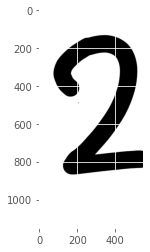

In [193]:
import cv2
img = cv2.imread('/home/rpsingh/Desktop/Machine_learning/two.jpg')
print(img.shape)
img = img[250: 1400 , 200: 750]
plt.imshow(img)

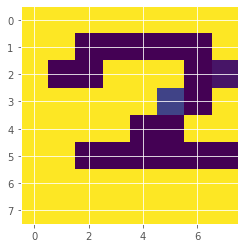

In [194]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (8, 8))
img = (img/255)*15
plt.imshow(img)

In [195]:
img = img.reshape(1, -1)


In [196]:
data[0].shape, img[0].shape

((64,), (64,))

In [197]:
result = Solution(data, target, img[0], 5)
result

2

In [ ]:
#it predict the handwritten digit 2 correctly